# Market Segmentation
## Electric Vehicle (EV) Market Segmentation
### Submitted By : Anubha Sharma 
1. **Market Potential for Electric Vehicles**
- The estimation indicates a substantial market potential for electric vehicles (EVs) in urban areas of India, considering the significant population density and potential for vehicle ownership
2. **Psychographic Segmentation**
- By segmenting the market based on psychographic, behavioral, geographic, and demographic factors, we can tailor marketing strategies and product offerings to meet the diverse needs and preferences of different consumer segments, thereby maximizing the effectiveness of our market entry strategy in India's electric vehicle market.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Step - 1 : Loading the Dataset 
#### Dataset Information 
**Data Sources for Electric Vehicle Market Analysis:**

1. **Electric Vehicle Models Dataset (dataset_1):**
   - Provides details on electric vehicle models in India, including specifications and pricing.
   - Crucial for understanding current EV landscape and identifying competitors.

2. **Indian Automobile Buying Behavior Study Dataset (dataset_2):**
   - Contains demographic and socio-economic info of car buyers in India.
   - Helps in segmenting market and predicting EV adoption based on buyer behavior.

3. **State-wise Electric and Non-electric Vehicle Registrations Dataset (dataset_3):**
   - Presents statistics on electric and non-electric vehicle registrations by state.
   - Essential for assessing regional EV adoption trends and identifying growth opportunities.

**Conclusion:**
   These datasets offer comprehensive insights into various aspects of the electric vehicle market in India. By analyzing electric vehicle models, buyer behavior, and regional registrations, we can formulate effective strategies for market entry, segmentation, and expansion. Leveraging this data allows for informed decision-making and targeted approaches to capitalize on the growing demand for electric vehicles in India.

In [39]:
dataset_1 = pd.read_csv('Dataset/EVIndia.csv')
dataset_1.head()

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE


In [40]:
dataset_2 = pd.read_csv('Dataset/Indian automoble buying behavour study 1.0.csv')
dataset_2.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [41]:
dataset_3 = pd.read_csv('Dataset/RS_Session_260_AU_2349_A_to_B.csv')
dataset_3.head()

,Sl.No.,State/UT,Electric,Non-electric
0,1,Andaman and Nicobar Islands,190,161258
1,2,Andhra Pradesh,67905,16553509
2,3,Arunachal Pradesh,28,303673
3,4,Assam,120423,5312457
4,5,Bihar,161060,11631081


### Step-2 : Data Preprocessing 

Data Preprocessing:
----------------------------
Missing Values:
Car             0
Style           0
Range           0
Transmission    0
VehicleType     0
PriceRange      0
Capacity        0
BootSpace       0
BaseModel       0
TopModel        0
dtype: int64

Unique Values:
Car             12
Style            7
Range           12
Transmission     1
VehicleType      1
PriceRange      12
Capacity         2
BootSpace        8
BaseModel        9
TopModel         7
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car           12 non-null     object
 1   Style         12 non-null     object
 2   Range         12 non-null     object
 3   Transmission  12 non-null     object
 4   VehicleType   12 non-null     object
 5   PriceRange    12 non-null     object
 6   Capacity      12 non-null     object
 7   BootSpace     1

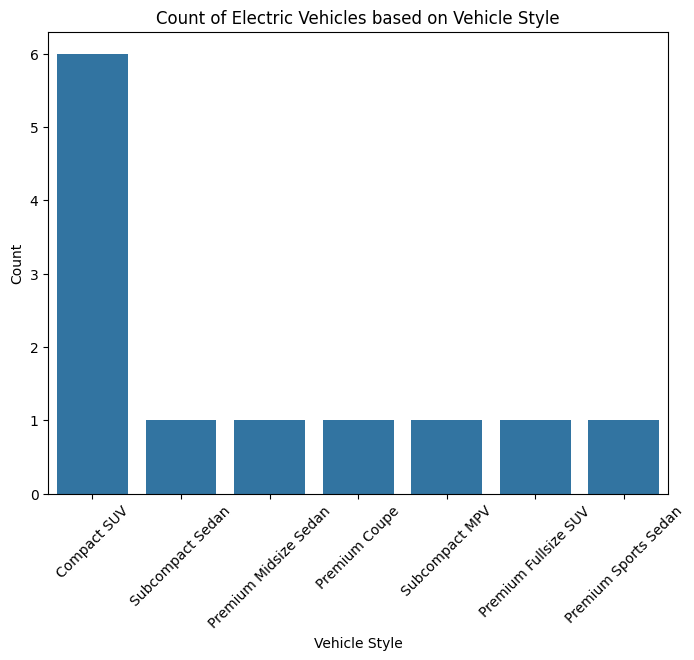

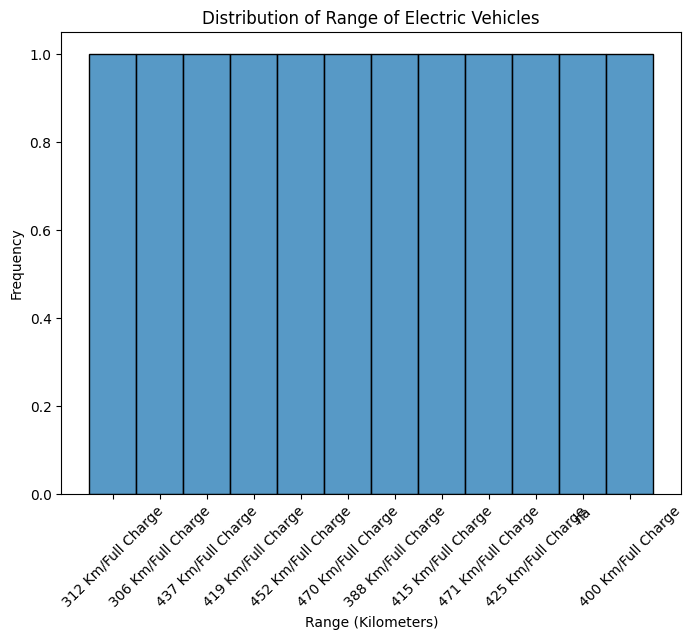

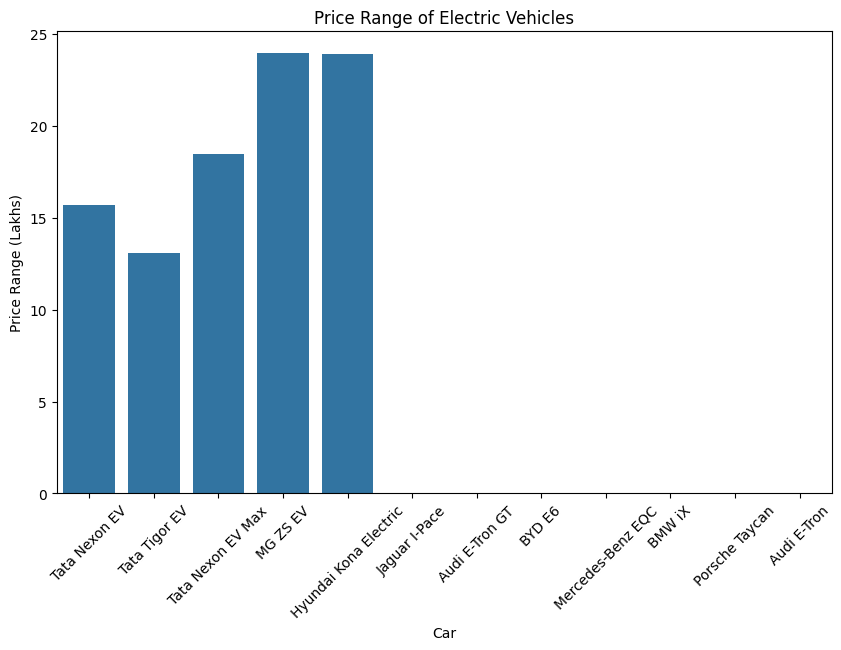

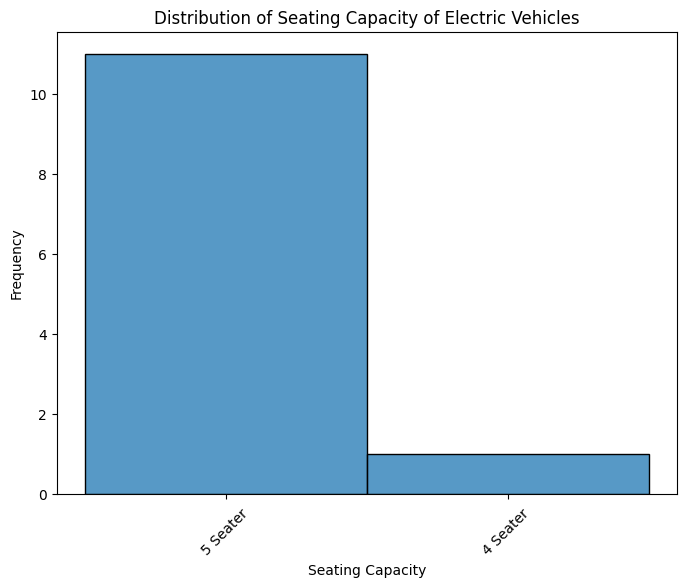

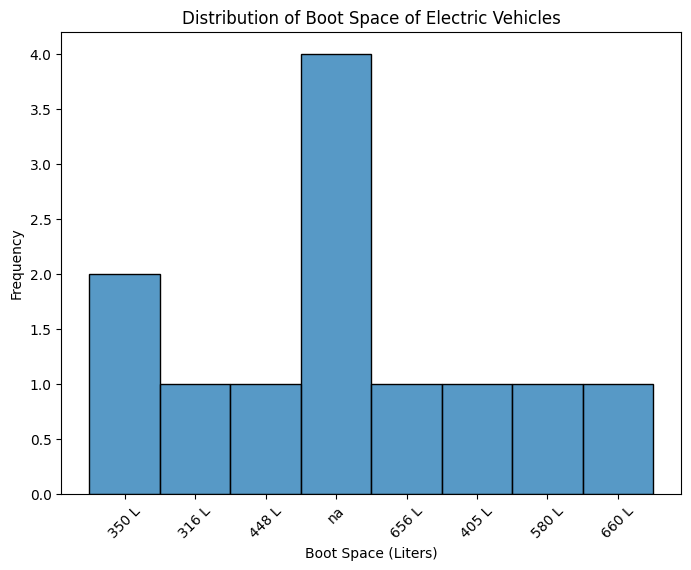

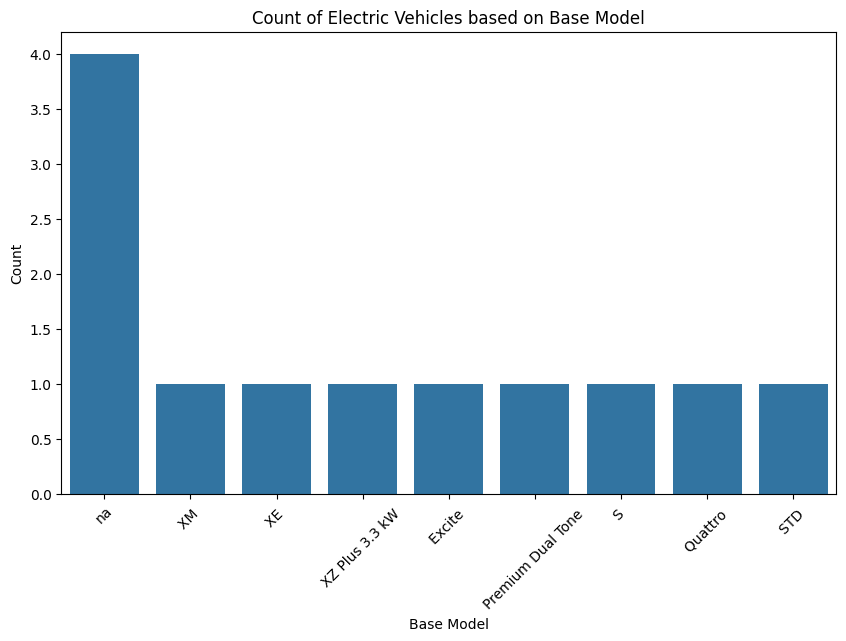

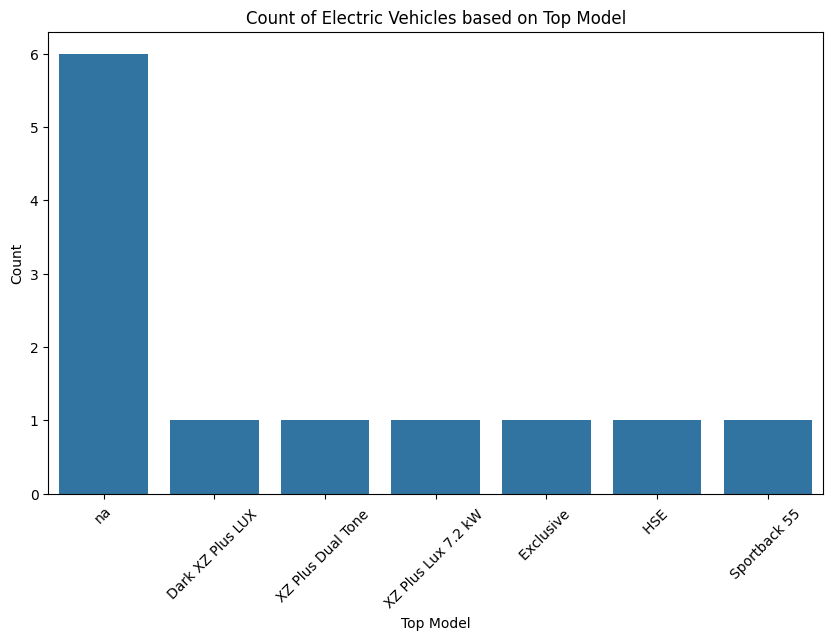

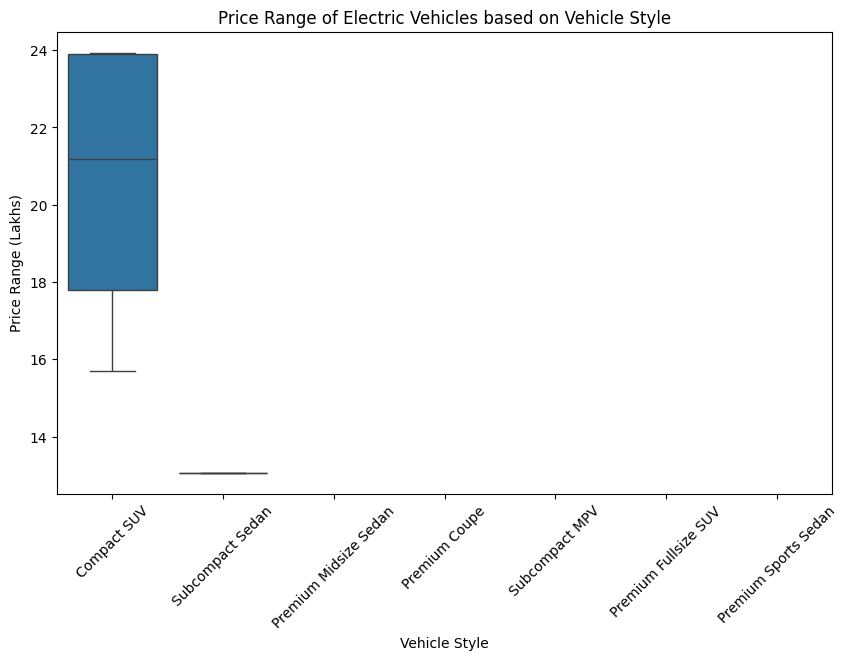

In [42]:
def preprocess_and_visualize_dataset_1(dataset_path):
    # Load the dataset
    dataset_1 = pd.read_csv(dataset_path)
    # Data Preprocessing
    print("Data Preprocessing:")
    print("----------------------------")
    # Check for missing values
    print("Missing Values:")
    print(dataset_1.isnull().sum())
    print()
    # Check for unique values
    print("Unique Values:")
    print(dataset_1.nunique())
    print()
    # Dataset Information
    print("Dataset Information:")
    print(dataset_1.info())
    print()
    # Visualization: Count plot for Vehicle Style
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Style', data=dataset_1)
    plt.title('Count of Electric Vehicles based on Vehicle Style')
    plt.xlabel('Vehicle Style')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    # Visualization: Histogram for Range
    plt.figure(figsize=(8, 6))
    sns.histplot(x='Range', data=dataset_1)
    plt.title('Distribution of Range of Electric Vehicles')
    plt.xlabel('Range (Kilometers)')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
    # Bar Plot for Price Range
    # Extracting numeric values from PriceRange column
    dataset_1['PriceRange'] = dataset_1['PriceRange'].str.extract(r'₹ (\d+\.\d+) - (\d+\.\d+) L').astype(float).mean(axis=1)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Car', y='PriceRange', data=dataset_1)
    plt.title('Price Range of Electric Vehicles')
    plt.xlabel('Car')
    plt.ylabel('Price Range (Lakhs)')
    plt.xticks(rotation=45)
    plt.show()
    # Histogram for Capacity
    plt.figure(figsize=(8, 6))
    sns.histplot(x='Capacity', data=dataset_1)
    plt.title('Distribution of Seating Capacity of Electric Vehicles')
    plt.xlabel('Seating Capacity')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
    # Histogram for Boot Space
    plt.figure(figsize=(8, 6))
    sns.histplot(x='BootSpace', data=dataset_1)
    plt.title('Distribution of Boot Space of Electric Vehicles')
    plt.xlabel('Boot Space (Liters)')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
    # Visualization: Count plot for Base Model
    plt.figure(figsize=(10, 6))
    sns.countplot(x='BaseModel', data=dataset_1, order=dataset_1['BaseModel'].value_counts().index)
    plt.title('Count of Electric Vehicles based on Base Model')
    plt.xlabel('Base Model')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    # Visualization: Count plot for Top Model
    plt.figure(figsize=(10, 6))
    sns.countplot(x='TopModel', data=dataset_1, order=dataset_1['TopModel'].value_counts().index)
    plt.title('Count of Electric Vehicles based on Top Model')
    plt.xlabel('Top Model')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    # Box Plot for Price Range vs. Vehicle Style
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Style', y='PriceRange', data=dataset_1)
    plt.title('Price Range of Electric Vehicles based on Vehicle Style')
    plt.xlabel('Vehicle Style')
    plt.ylabel('Price Range (Lakhs)')
    plt.xticks(rotation=45)
    plt.show()
preprocess_and_visualize_dataset_1('Dataset/EVIndia.csv')


Data Preprocessing:
----------------------------
Missing Values:
Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

Unique Values:
Age                 22
Profession           2
Marrital Status      2
Education            2
No of Dependents     4
Personal loan        2
House Loan           2
Wife Working         3
Salary              24
Wife Salary         14
Total Salary        36
Make                 9
Price               10
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object

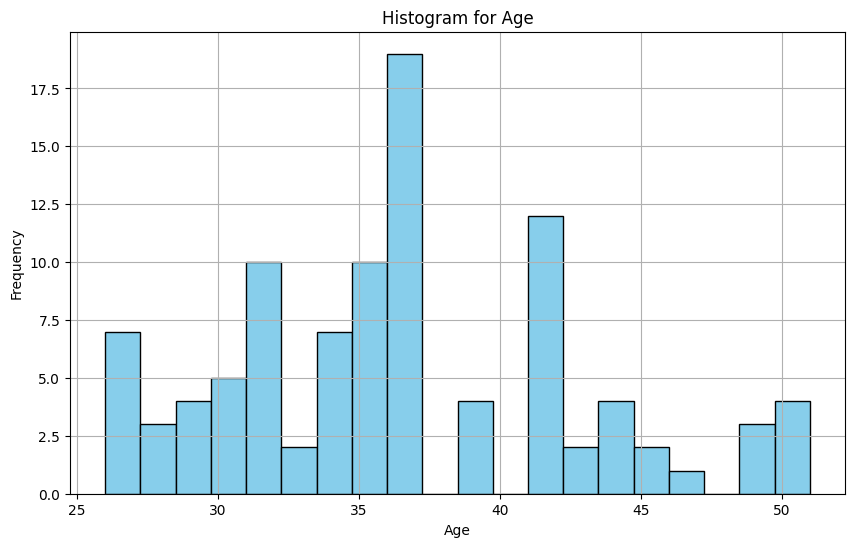

C:\Users\anubh\AppData\Local\Temp\ipykernel_15560\139244668.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Profession', data=dataset_2, palette='viridis')


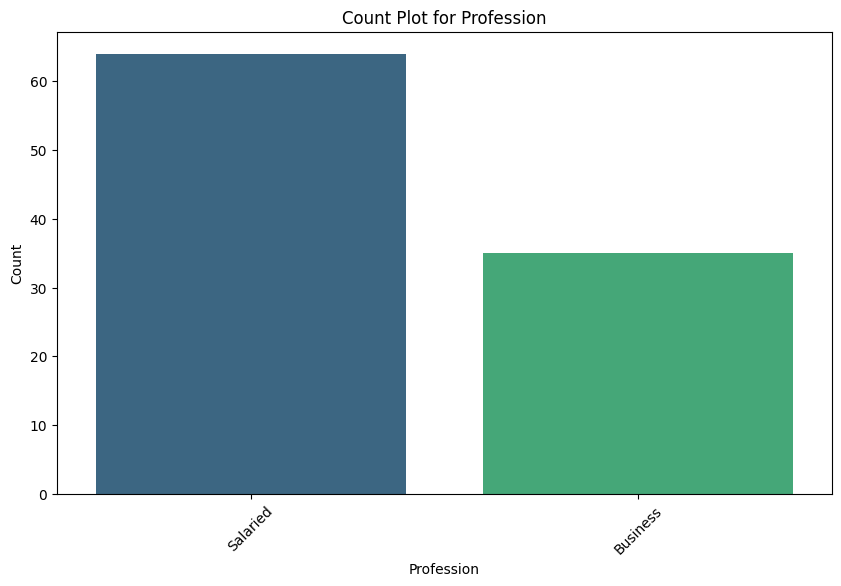

C:\Users\anubh\AppData\Local\Temp\ipykernel_15560\139244668.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marrital Status', data=dataset_2, palette='magma')


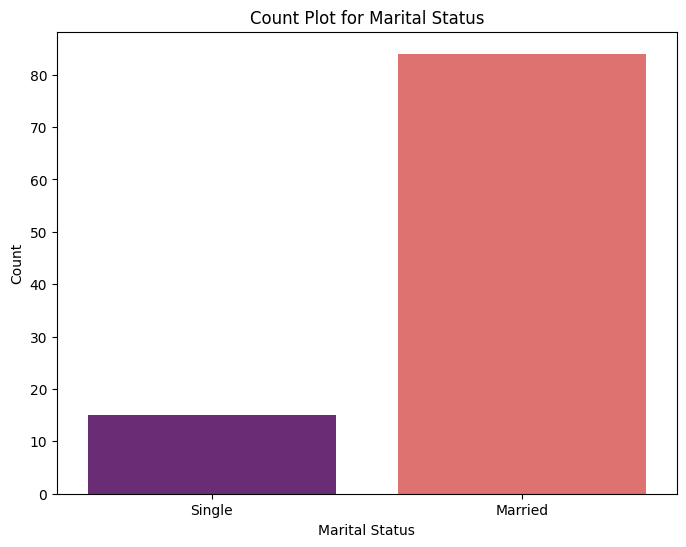

C:\Users\anubh\AppData\Local\Temp\ipykernel_15560\139244668.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=dataset_2, palette='rocket')


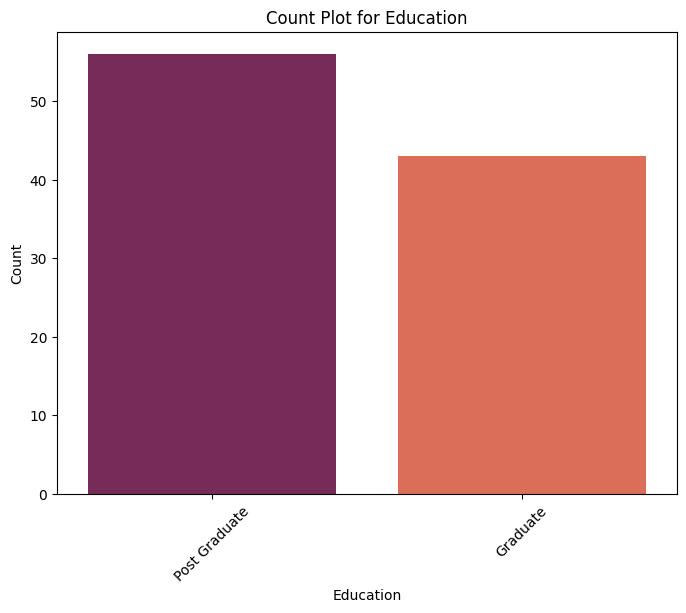

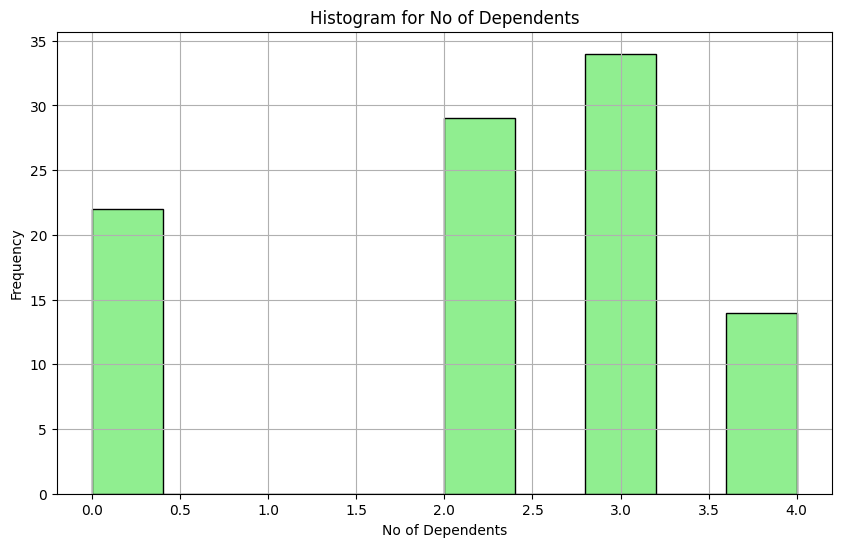

C:\Users\anubh\AppData\Local\Temp\ipykernel_15560\139244668.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Personal loan', data=dataset_2, palette='pastel')


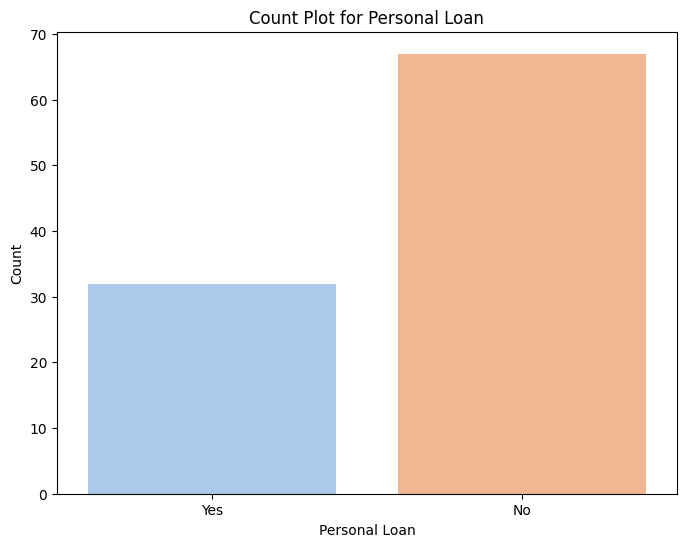

C:\Users\anubh\AppData\Local\Temp\ipykernel_15560\139244668.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='House Loan', data=dataset_2, palette='colorblind')


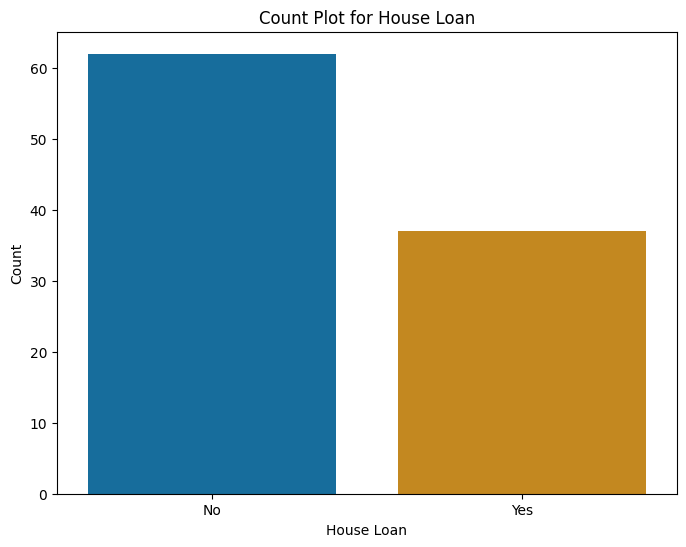

C:\Users\anubh\AppData\Local\Temp\ipykernel_15560\139244668.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Wife Working', data=dataset_2, palette='Set3')


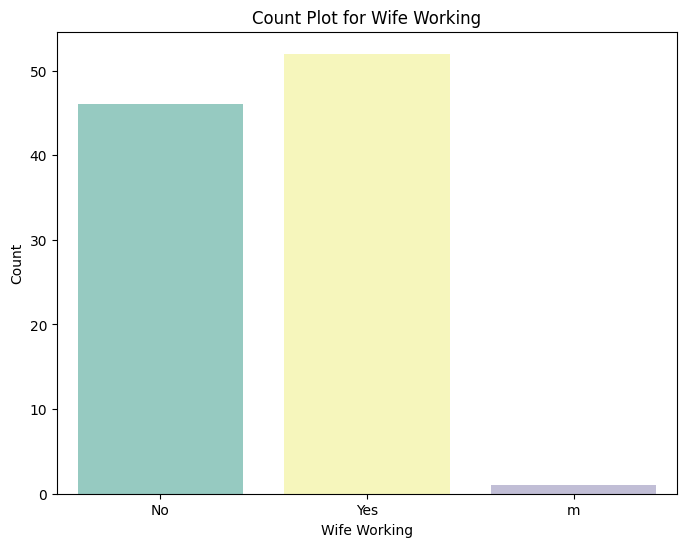

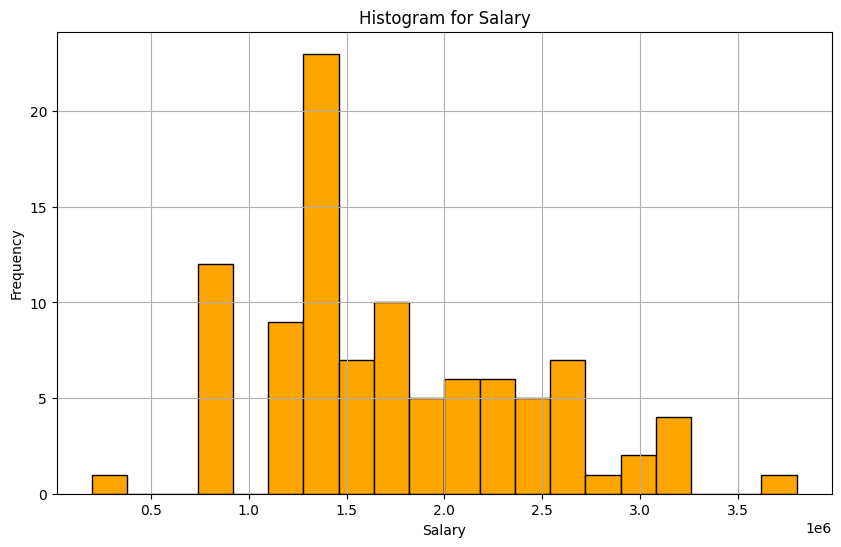

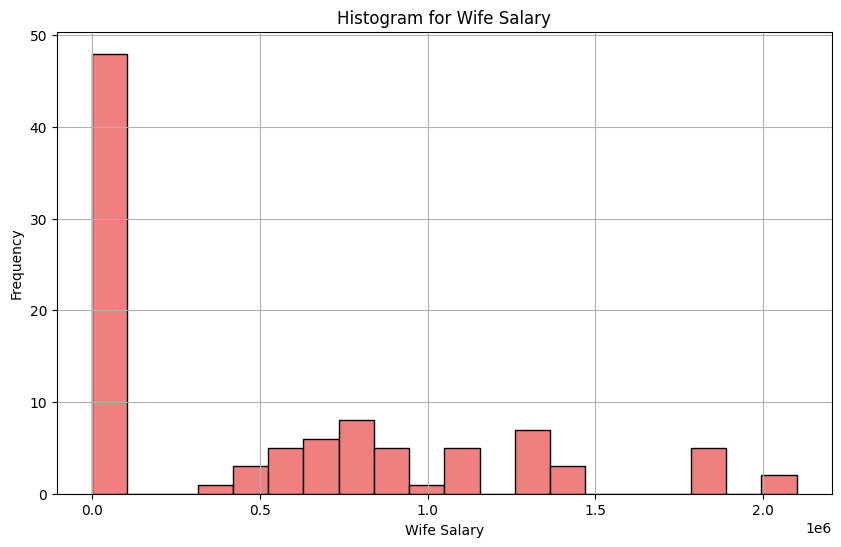

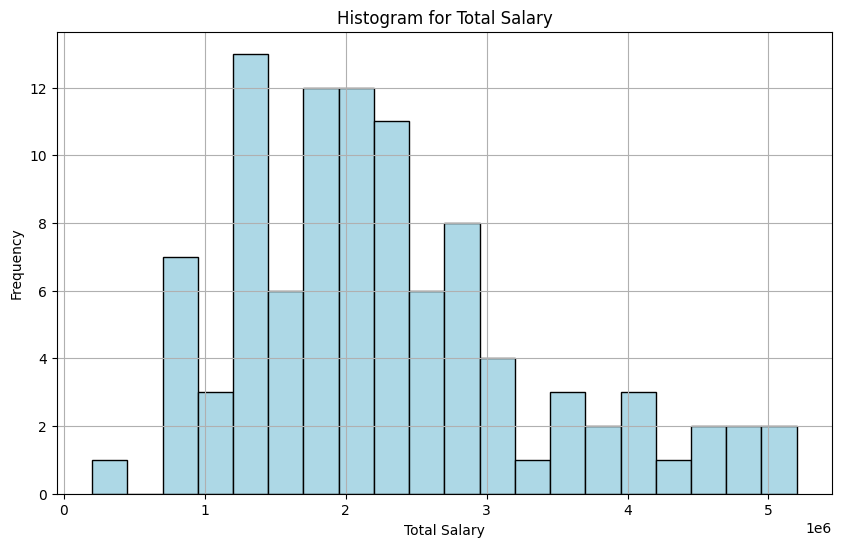

C:\Users\anubh\AppData\Local\Temp\ipykernel_15560\139244668.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marrital Status', y='Salary', data=dataset_2, palette='husl')


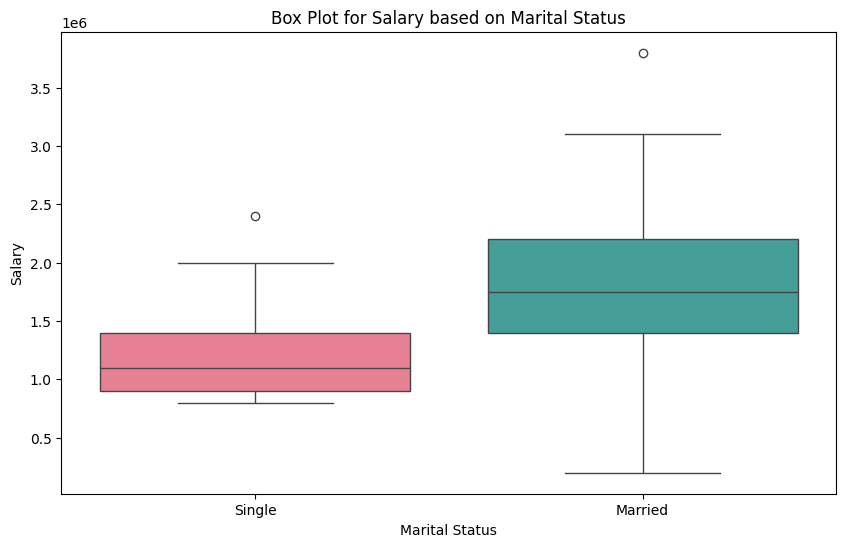

In [43]:
import pandas as pd
import matplotlib.pyplot as plt 
def preprocess_and_visualize_dataset_2(dataset_path):
    # Load the dataset
    dataset_2 = pd.read_csv(dataset_path)
    # Data Preprocessing
    print("Data Preprocessing:")
    print("----------------------------")
    # Check for missing values
    print("Missing Values:")
    print(dataset_2.isnull().sum())
    print()
    # Check for unique values
    print("Unique Values:")
    print(dataset_2.nunique())
    print()
    # Dataset Information
    print("Dataset Information:")
    print(dataset_2.info())
    print()
    # Visualization: Histogram for Age
    plt.figure(figsize=(10, 6))
    plt.hist(dataset_2['Age'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram for Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    # Visualization: Count plot for Profession
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Profession', data=dataset_2, palette='viridis')
    plt.title('Count Plot for Profession')
    plt.xlabel('Profession')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    # Visualization: Count plot for Marital Status
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Marrital Status', data=dataset_2, palette='magma')
    plt.title('Count Plot for Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel('Count')
    plt.show()
    # Visualization: Count plot for Education
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Education', data=dataset_2, palette='rocket')
    plt.title('Count Plot for Education')
    plt.xlabel('Education')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    # Visualization: Histogram for No of Dependents
    plt.figure(figsize=(10, 6))
    plt.hist(dataset_2['No of Dependents'], bins=10, color='lightgreen', edgecolor='black')
    plt.title('Histogram for No of Dependents')
    plt.xlabel('No of Dependents')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    # Visualization: Count plot for Personal Loan
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Personal loan', data=dataset_2, palette='pastel')
    plt.title('Count Plot for Personal Loan')
    plt.xlabel('Personal Loan')
    plt.ylabel('Count')
    plt.show()
    # Visualization: Count plot for House Loan
    plt.figure(figsize=(8, 6))
    sns.countplot(x='House Loan', data=dataset_2, palette='colorblind')
    plt.title('Count Plot for House Loan')
    plt.xlabel('House Loan')
    plt.ylabel('Count')
    plt.show()
    # Visualization: Count plot for Wife Working
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Wife Working', data=dataset_2, palette='Set3')
    plt.title('Count Plot for Wife Working')
    plt.xlabel('Wife Working')
    plt.ylabel('Count')
    plt.show()
    # Visualization: Histogram for Salary
    plt.figure(figsize=(10, 6))
    plt.hist(dataset_2['Salary'], bins=20, color='orange', edgecolor='black')
    plt.title('Histogram for Salary')
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    # Visualization: Histogram for Wife Salary
    plt.figure(figsize=(10, 6))
    plt.hist(dataset_2['Wife Salary'], bins=20, color='lightcoral', edgecolor='black')
    plt.title('Histogram for Wife Salary')
    plt.xlabel('Wife Salary')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    # Visualization: Histogram for Total Salary
    plt.figure(figsize=(10, 6))
    plt.hist(dataset_2['Total Salary'], bins=20, color='lightblue', edgecolor='black')
    plt.title('Histogram for Total Salary')
    plt.xlabel('Total Salary')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    # Visualization: Box plot for Salary based on Marital Status
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Marrital Status', y='Salary', data=dataset_2, palette='husl')
    plt.title('Box Plot for Salary based on Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel('Salary')
    plt.show()
preprocess_and_visualize_dataset_2('Dataset/Indian automoble buying behavour study 1.0.csv')


Distribution of Profession
Profession
Salaried    0.646465
Business    0.353535
Name: proportion, dtype: float64

Distribution of Marrital Status
Marrital Status
Married    0.848485
Single     0.151515
Name: proportion, dtype: float64

Distribution of Education
Education
Post Graduate    0.565657
Graduate         0.434343
Name: proportion, dtype: float64

Distribution of Personal loan
Personal loan
No     0.676768
Yes    0.323232
Name: proportion, dtype: float64

Distribution of House Loan
House Loan
No     0.626263
Yes    0.373737
Name: proportion, dtype: float64

Distribution of Wife Working
Wife Working
Yes    0.525253
No     0.464646
m      0.010101
Name: proportion, dtype: float64


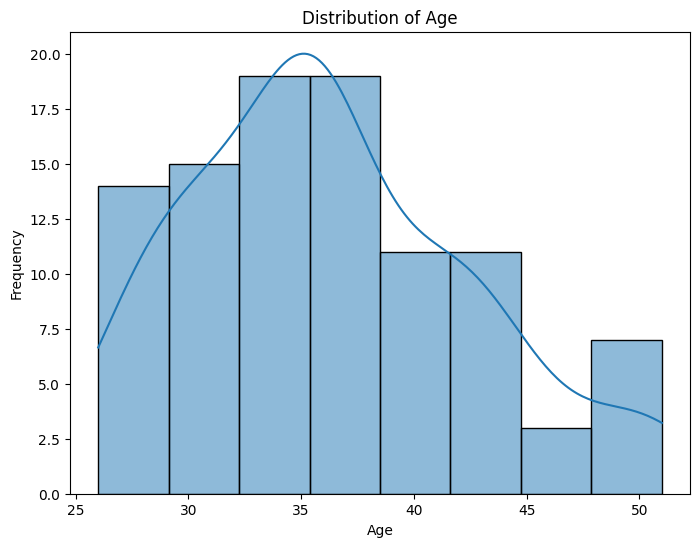

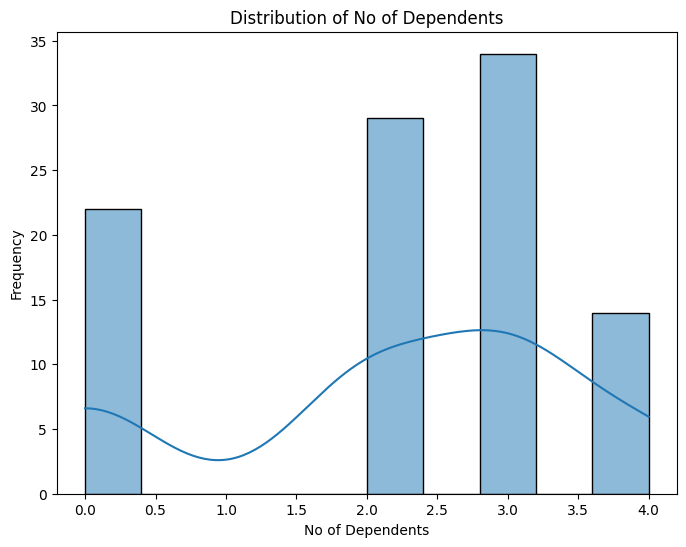

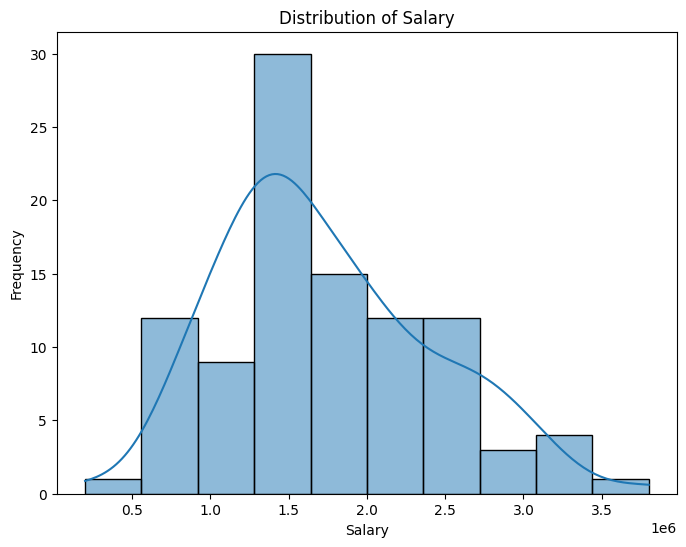

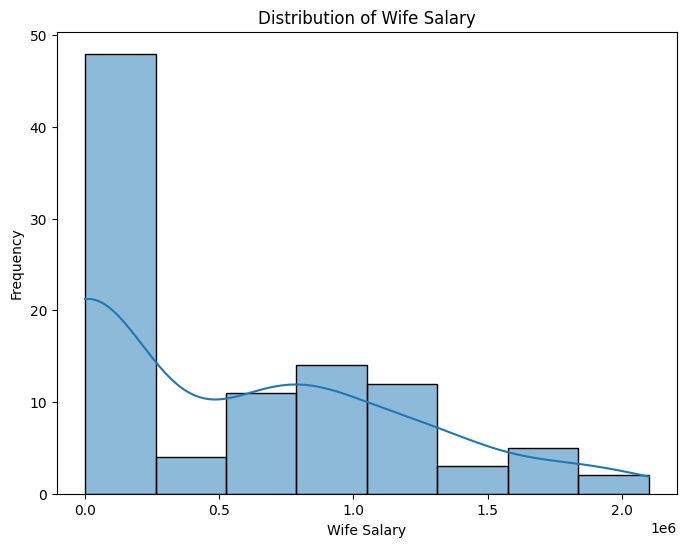

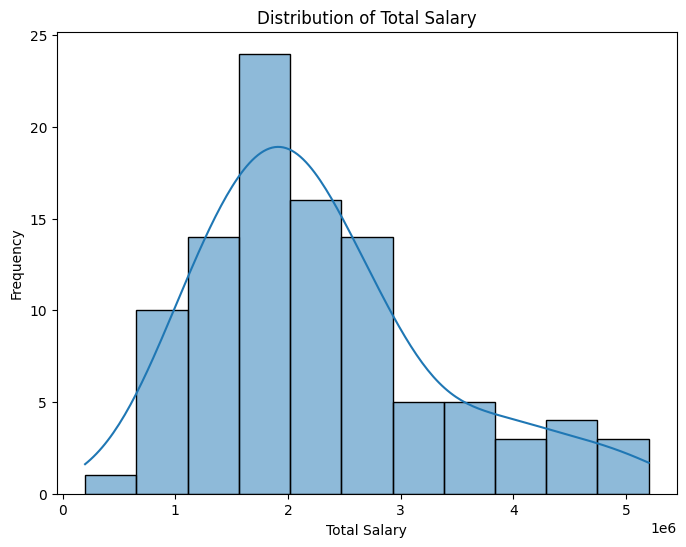

<Figure size 1000x800 with 0 Axes>

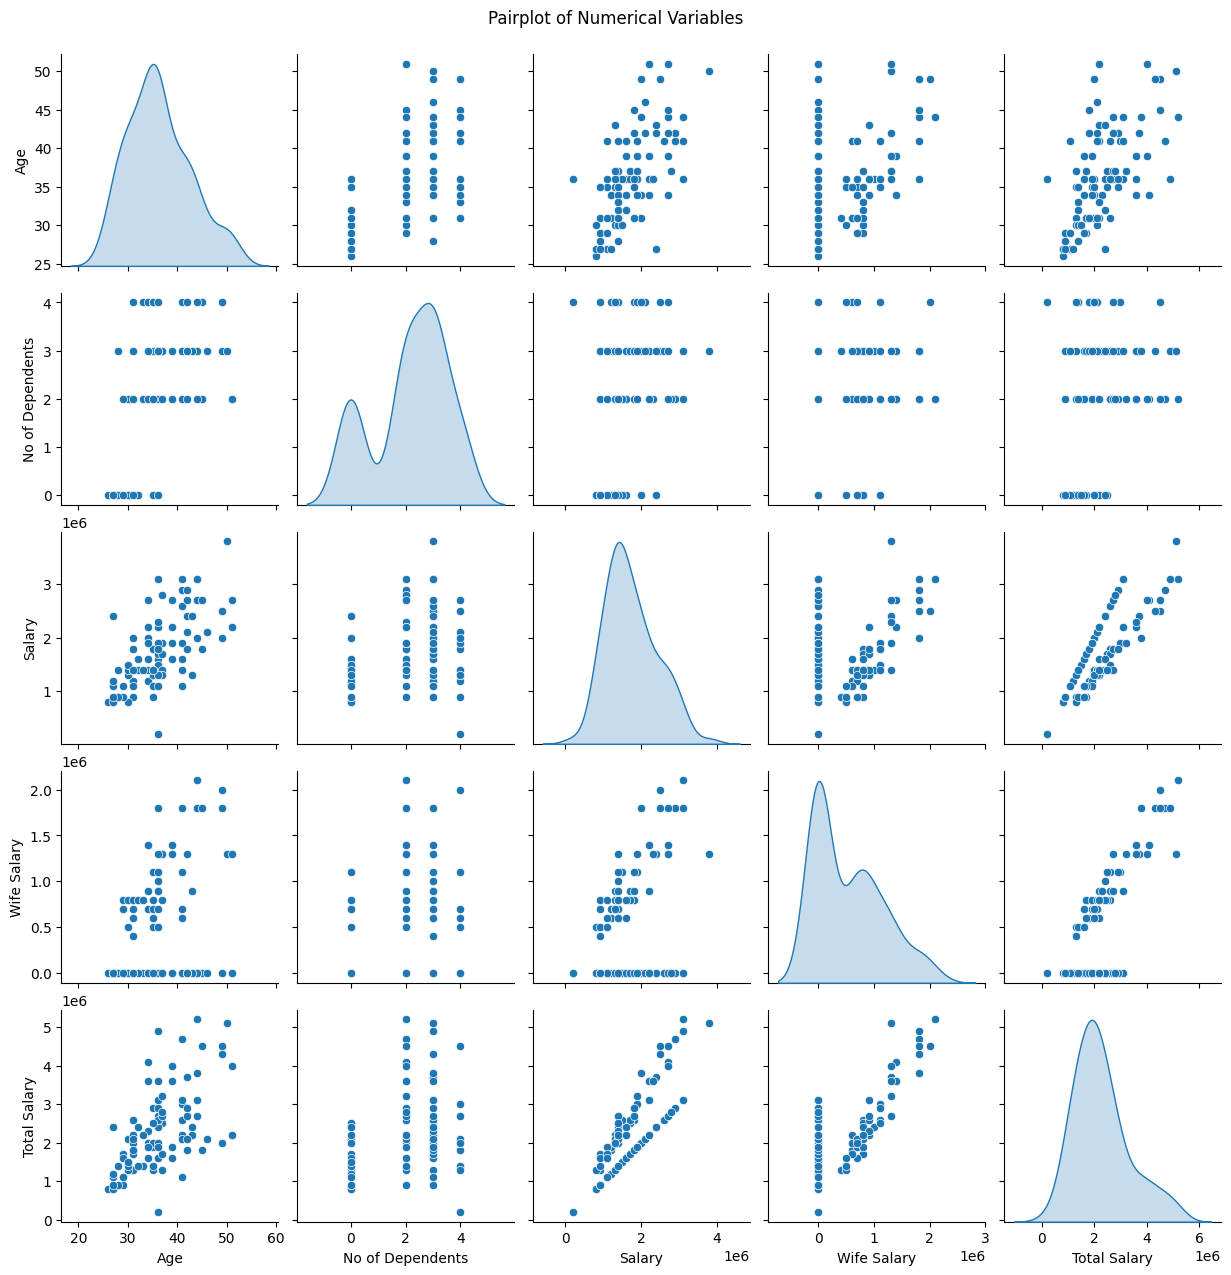

In [44]:
# Explore the distribution of categorical variables
categorical_columns = ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working']
for col in categorical_columns:
    print("\nDistribution of", col)
    print(dataset_2[col].value_counts(normalize=True))
# Visualize the distribution of numerical variables
numerical_columns = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary']
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(dataset_2[col], kde=True)
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
# Explore relationships between variables using scatter plots or pair plots
plt.figure(figsize=(10, 8))
sns.pairplot(dataset_2[numerical_columns], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

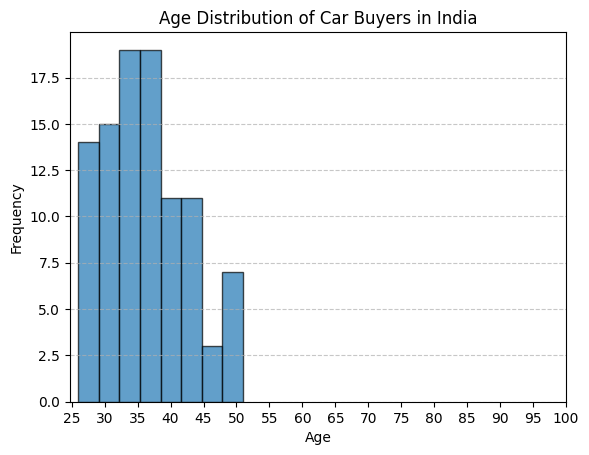

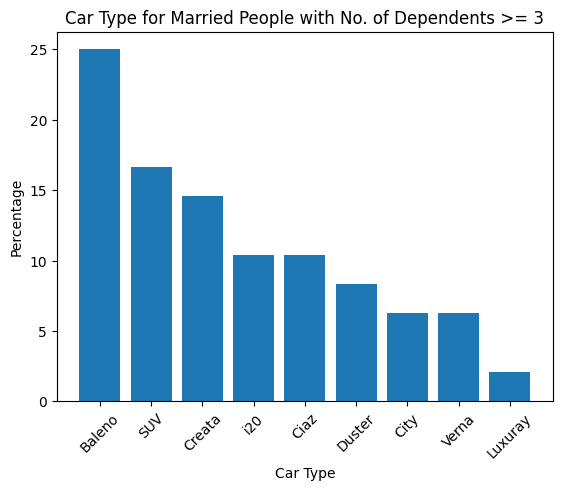

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
# Plotting Age Group % Buying Cars in India
plt.hist(dataset_2['Age'], bins=8, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Car Buyers in India')
plt.xticks(range(25, 101, 5))  # Adjust x-axis ticks as needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Analyzing Married and No.of.Dependents >= 3
married_with_dependents = dataset_2[(dataset_2['Marrital Status'] == 'Married') & (dataset_2['No of Dependents'] >= 3)]
# Car Type chart
car_type_counts = married_with_dependents['Make'].value_counts(normalize=True) * 100
plt.bar(car_type_counts.index, car_type_counts)
plt.xlabel('Car Type')
plt.ylabel('Percentage')
plt.title('Car Type for Married People with No. of Dependents >= 3')
plt.xticks(rotation=45)
plt.show()

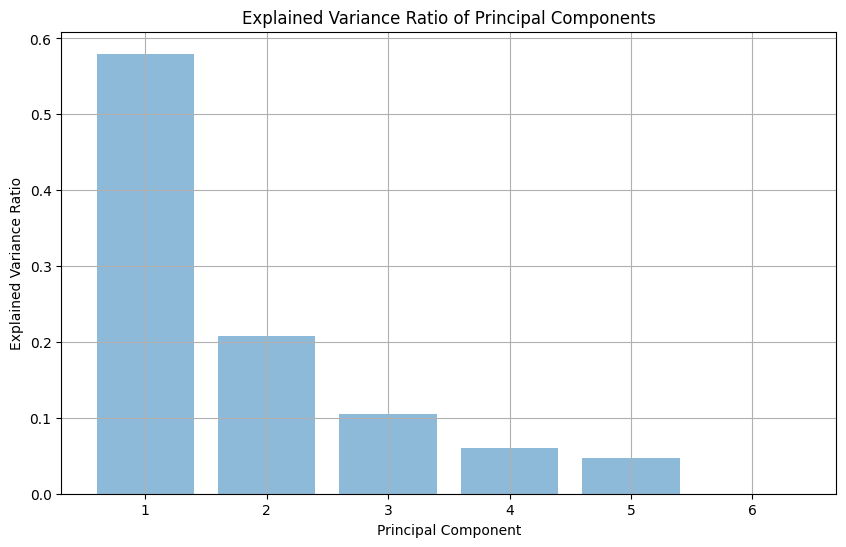

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Select numeric columns if needed
numeric_columns = dataset_2.select_dtypes(include=['int64', 'float64'])
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)
# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)
plt.show()


Data Preprocessing:
----------------------------
Missing Values:
Sl_No           0
State_UT        0
Electric        0
Non_electric    0
dtype: int64

Unique Values:
Sl_No           34
State_UT        34
Electric        34
Non_electric    34
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sl_No         34 non-null     object
 1   State_UT      34 non-null     object
 2   Electric      34 non-null     int64 
 3   Non_electric  34 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ KB
None



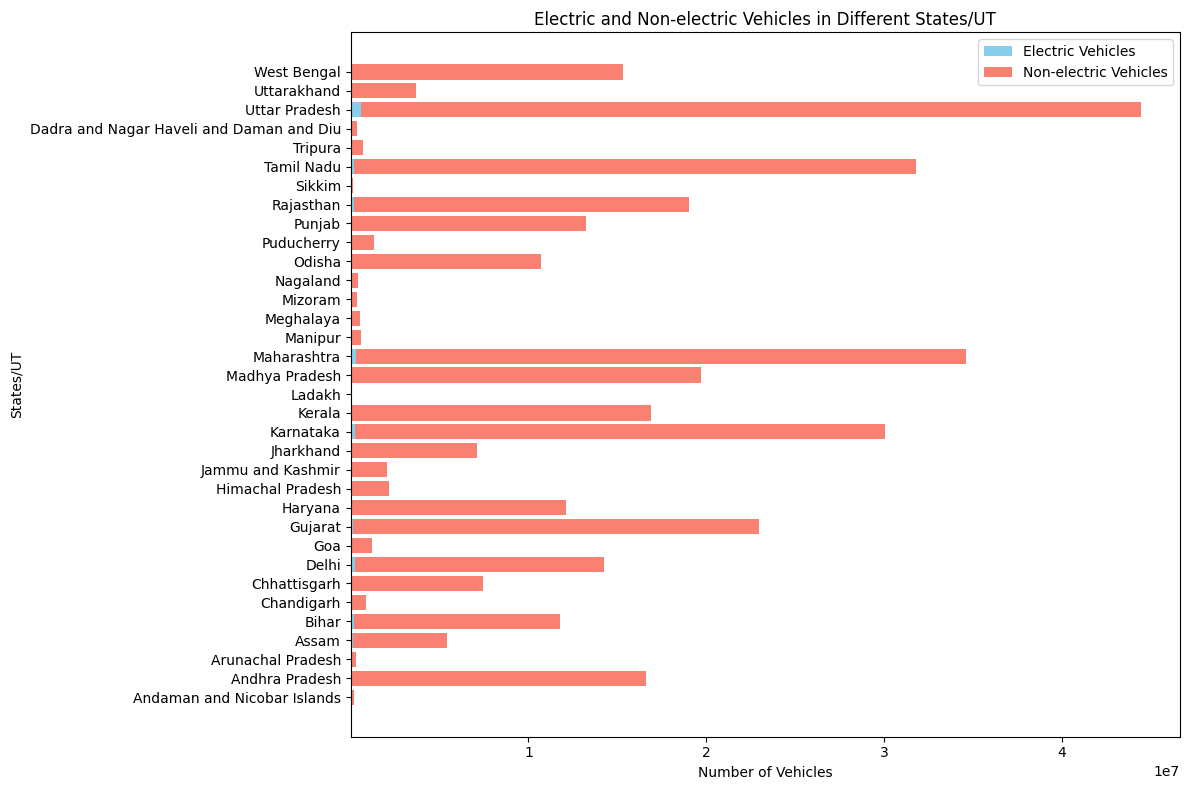

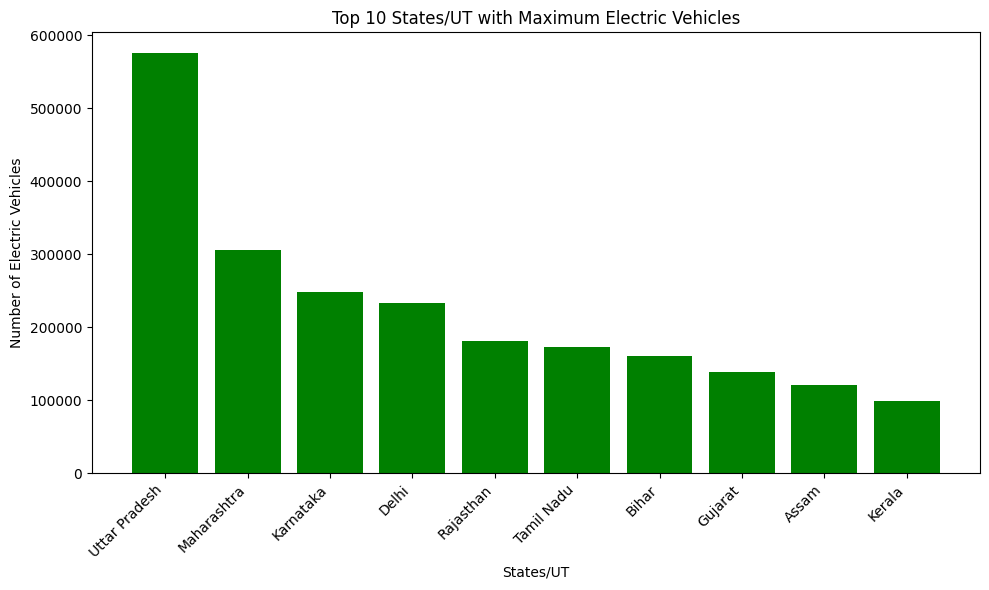

In [46]:
def preprocess_and_visualize_dataset_3(dataset_path):
    # Load the dataset
    dataset_3 = pd.read_csv(dataset_path)
    # Rename columns for better readability
    dataset_3.columns = ['Sl_No', 'State_UT', 'Electric', 'Non_electric']
    # Remove the row containing grand total
    dataset_3 = dataset_3[dataset_3['State_UT'] != 'Grand Total']
    # Data Preprocessing
    print("Data Preprocessing:")
    print("----------------------------")
    # Check for missing values
    print("Missing Values:")
    print(dataset_3.isnull().sum())
    print()
    # Check for unique values
    print("Unique Values:")
    print(dataset_3.nunique())
    print()
    # Dataset Information
    print("Dataset Information:")
    print(dataset_3.info())
    print()
    # Visualization: Double bar chart for electric and non-electric vehicles in different states
    plt.figure(figsize=(12, 8))
    plt.barh(dataset_3['State_UT'], dataset_3['Electric'], color='skyblue', label='Electric Vehicles')
    plt.barh(dataset_3['State_UT'], dataset_3['Non_electric'], color='salmon', left=dataset_3['Electric'], label='Non-electric Vehicles')
    plt.xlabel('Number of Vehicles')
    plt.ylabel('States/UT')
    plt.title('Electric and Non-electric Vehicles in Different States/UT')
    plt.legend()
    plt.tight_layout()
    plt.show()
    # Find top 10 states with max electric vehicles
    top_10_electric_states = dataset_3.nlargest(10, 'Electric')
    # Visualization: Bar plot for top 10 states with max electric vehicles
    plt.figure(figsize=(10, 6))
    plt.bar(top_10_electric_states['State_UT'], top_10_electric_states['Electric'], color='green')
    plt.xlabel('States/UT')
    plt.ylabel('Number of Electric Vehicles')
    plt.title('Top 10 States/UT with Maximum Electric Vehicles')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
preprocess_and_visualize_dataset_3('Dataset/RS_Session_260_AU_2349_A_to_B.csv')


## Segment Extraction (ML techniques used)

Based on the Elbow Method analysis conducted on our dataset, we determined that the optimal number of clusters for the K-Means algorithm is 4. This conclusion was drawn by observing the inertia plot, where the rate of decrease in inertia slowed significantly after reaching four clusters. Therefore, we will use ( k = 4 ) to segment our data into four distinct clusters, enabling us to identify meaningful patterns and segments within the dataset.


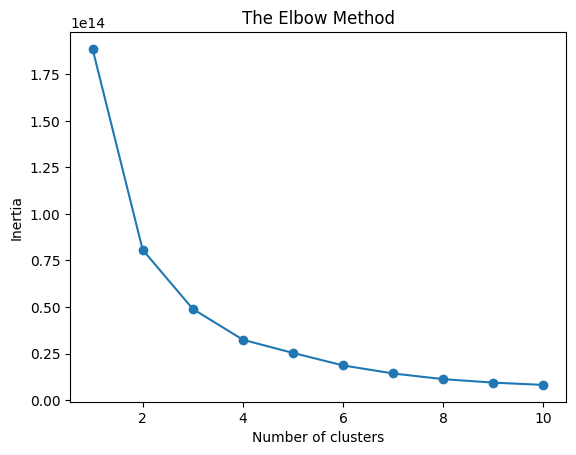

In [47]:
from sklearn.cluster import KMeans
# Assuming dataset_2 contains the DataFrame with the provided data
data = dataset_2[['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary']]  # Selecting relevant numeric features
# Create an empty list to store inertia values
inertia = []
# Loop through each cluster number from 1 to 10
for j in range(1, 11):
    kmeans = KMeans(n_clusters=j, init='k-means++', max_iter=300, n_init=18, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the inertia values for these clusters to choose the appropriate number of clusters
plt.plot(range(1, 11), inertia, marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\anubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\cluster\hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


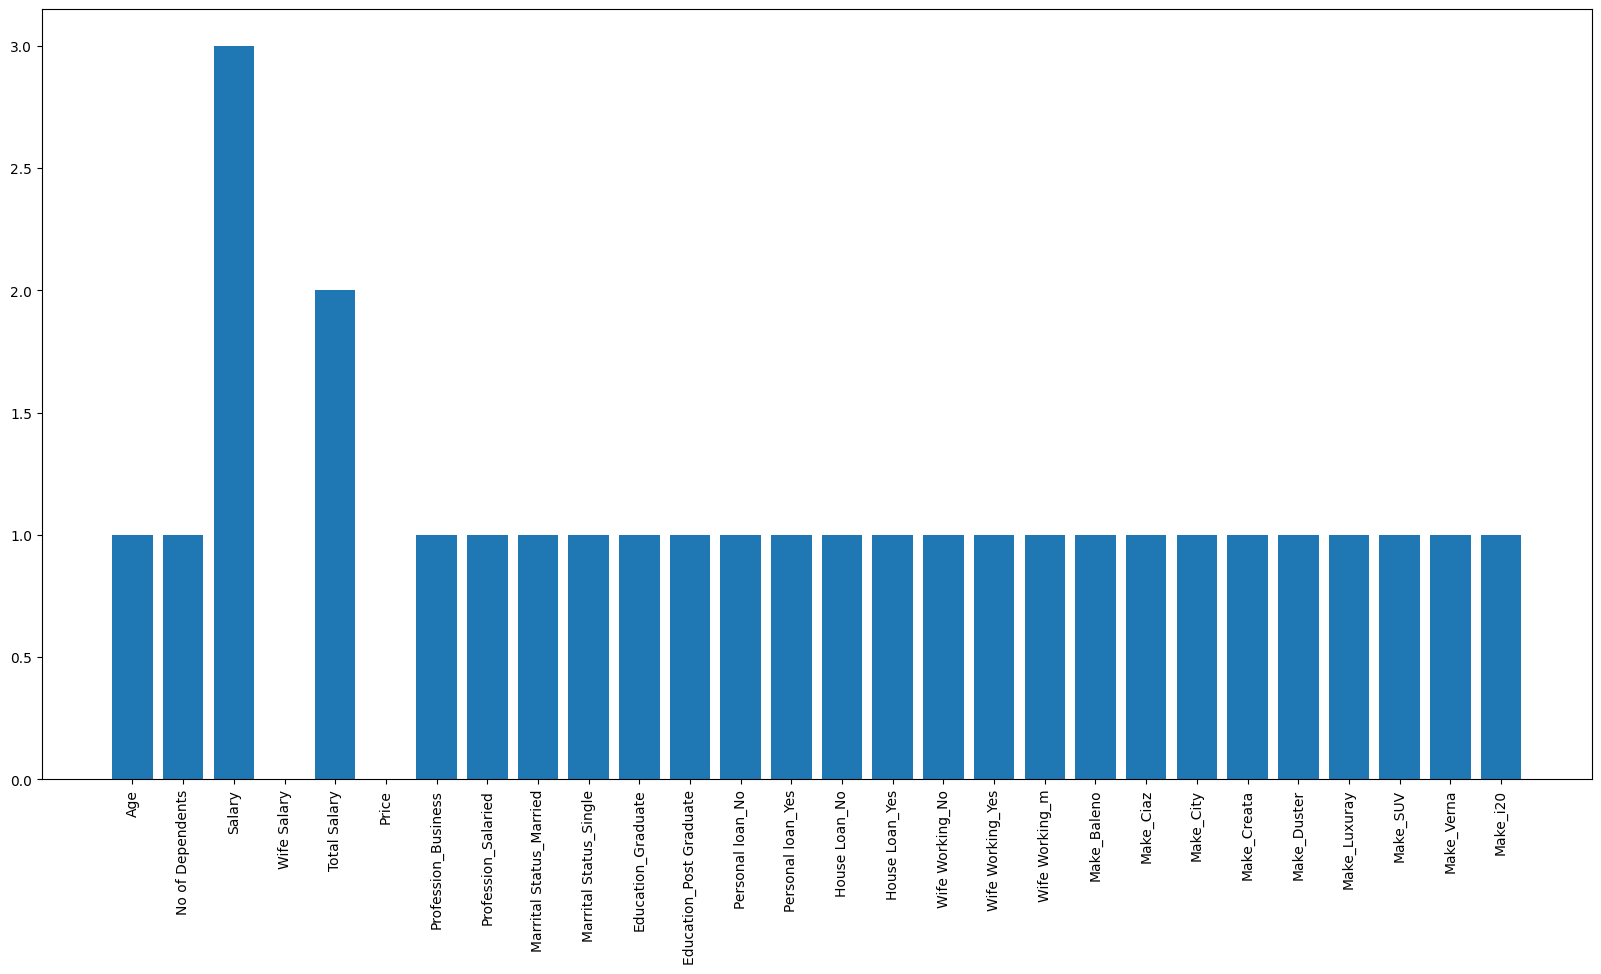

In [49]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import pandas as pd
# Perform one-hot encoding for categorical variables
encoded_data = pd.get_dummies(dataset_2)
# Compute pairwise distances
distance_mat = pairwise_distances(encoded_data.T)
# Perform hierarchical clustering to get segment profile plot
agg_cluster = AgglomerativeClustering(n_clusters=4)
segment_labels = agg_cluster.fit_predict(distance_mat)
# Plot the segment profile plot
# Plot the segment profile plot with rotated x-axis labels
plt.figure(figsize=(20, 10))
plt.bar(encoded_data.columns, segment_labels)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()



## Profiling and describing potential segments


In [53]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Mosaic Plot for AgeGroup
plt.figure(figsize=(10, 6))
sns.mosaicplot(dataset_2, ['AgeGroup'], gap=0.01)
plt.title('Mosaic Plot for AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('Count')
plt.show()
# Description: The mosaic plot shows the distribution of consumers across different age groups.

# Mosaic Plot for Profession
plt.figure(figsize=(10, 6))
sns.mosaicplot(dataset_2, ['Profession'], gap=0.01)
plt.title('Mosaic Plot for Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.show()
# Description: The mosaic plot illustrates the distribution of consumers among different professions.

# Mosaic Plot for Marital Status
plt.figure(figsize=(10, 6))
sns.mosaicplot(dataset_2, ['Marrital Status'], gap=0.01)
plt.title('Mosaic Plot for Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()
# Description: This mosaic plot displays the distribution of consumers based on their marital status.

# Mosaic Plot for Education
plt.figure(figsize=(10, 6))
sns.mosaicplot(dataset_2, ['Education'], gap=0.01)
plt.title('Mosaic Plot for Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()
# Description: The mosaic plot visualizes the distribution of consumers by their education levels.

# Mosaic Plot for Number of Dependents
plt.figure(figsize=(10, 6))
sns.mosaicplot(dataset_2, ['No of Dependents'], gap=0.01)
plt.title('Mosaic Plot for Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()
# Description: This mosaic plot demonstrates the distribution of consumers based on the number of dependents they have.

# Mosaic Plot for Wife Working
plt.figure(figsize=(10, 6))
sns.mosaicplot(dataset_2, ['Wife Working'], gap=0.01)
plt.title('Mosaic Plot for Wife Working')
plt.xlabel('Wife Working')
plt.ylabel('Count')
plt.show()
# Description: The mosaic plot illustrates whether the wife is working or not for each consumer.

# Bar Plot Showing Total Salary of Consumers with respect to their Age
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Total Salary', data=dataset_2)
plt.title('Bar Plot Showing Total Salary of Consumers with respect to their Age')
plt.xlabel('Age')
plt.ylabel('Total Salary')
plt.show()
# Description: This bar plot depicts the total salary of consumers with respect to their age.

# Mosaic Plot for Financial Condition
plt.figure(figsize=(10, 6))
sns.mosaicplot(dataset_2, ['Financial Condition'], gap=0.01)
plt.title('Mosaic Plot for Financial Condition')
plt.xlabel('Financial Condition')
plt.ylabel('Count')
plt.show()
# Description: The mosaic plot shows the distribution of consumers across different financial conditions.

# Mosaic Plot for Car Type
plt.figure(figsize=(10, 6))
sns.mosaicplot(dataset_2, ['Car Type'], gap=0.01)
plt.title('Mosaic Plot for Car Type')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.show()
# Description: This mosaic plot displays the distribution of consumers among different car types.

AttributeError: module 'seaborn' has no attribute 'mosaicplot'

<Figure size 1000x600 with 0 Axes>